In [81]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [82]:
## implementar a função que identifica a bandeira
## a função deve receber uma imagem e retornar a bandeira identificada
## a função deve retornar uma lista de tuplas, onde cada tupla contém as coordenadas de um dos cantos da bandeira
## [(PAIS, (x1, y2), (x2, y2)`),(PAIS, (x1, y2), (x2, y2)`),(PAIS, (x1, y2), (x2, y2)`),...]

def identifica_bandeira(img):
    resultados = []
    bandeiras_detectadas = set()  # Para rastrear bandeiras únicas já encontradas

    if img is None:
        print("Erro: Imagem não carregada.")
        return []

    # Converter a imagem para HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Intervalos HSV ajustados para cada bandeira
    bandeiras = {
        "Monaco": {
            "cores": [
                (np.array([0, 120, 70]), np.array([10, 255, 255])),  # Vermelho
                (np.array([0, 0, 200]), np.array([180, 20, 255]))   # Branco
            ],
            "orientacao": "horizontal"
        },
        "Peru": {
            "cores": [
                (np.array([0, 120, 70]), np.array([10, 255, 255])),  # Vermelho
                (np.array([0, 0, 200]), np.array([180, 20, 255]))   # Branco
            ],
            "orientacao": "vertical"
        },
        "Singapura": {
            "cores": [
                (np.array([0, 140, 70]), np.array([10, 255, 255])),  # Vermelho mais vibrante
                (np.array([0, 0, 220]), np.array([180, 50, 255]))   # Branco intenso para lua e estrelas
            ],
            "orientacao": "horizontal"
        },
        "Itália": {
            "cores": [
                (np.array([35, 50, 50]), np.array([85, 255, 255])),  # Verde
                (np.array([0, 0, 200]), np.array([180, 20, 255])),   # Branco
                (np.array([0, 100, 100]), np.array([10, 255, 255]))  # Vermelho
            ],
            "orientacao": "vertical"
        },
        "Irlanda": {
            "cores": [
                (np.array([35, 50, 50]), np.array([85, 255, 255])),  # Verde
                (np.array([0, 0, 200]), np.array([180, 20, 255])),   # Branco
                (np.array([10, 100, 100]), np.array([25, 255, 255])) # Laranja
            ],
            "orientacao": "vertical"
        }
    }

    for pais, config in bandeiras.items():
        # Evitar processar bandeiras já detectadas
        if pais in bandeiras_detectadas:
            continue

        mask_total = np.zeros(img.shape[:2], dtype=np.uint8)

        for lower, upper in config["cores"]:
            mask = cv2.inRange(hsv, lower, upper)
            mask_total = cv2.bitwise_or(mask_total, mask)

        # Processamento para reduzir ruídos
        kernel = np.ones((5, 5), np.uint8)
        mask_total = cv2.morphologyEx(mask_total, cv2.MORPH_CLOSE, kernel)
        mask_total = cv2.morphologyEx(mask_total, cv2.MORPH_OPEN, kernel)

        # Encontrar contornos na máscara
        contornos, _ = cv2.findContours(mask_total, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for cnt in contornos:
            x, y, w, h = cv2.boundingRect(cnt)
            proporcao = w / h
            orientacao = "horizontal" if proporcao > 1 else "vertical"

            # Filtrar contornos baseados em proporção e orientação
            if w > 30 and h > 20 and config["orientacao"] == orientacao:
                ja_detectada = any(
                    abs(resultado[1][0] - x) < 50 and abs(resultado[1][1] - y) < 50
                    for resultado in resultados
                )
                if not ja_detectada:
                    resultados.append((pais, (x, y), (x + w, y + h)))
                    bandeiras_detectadas.add(pais)  # Adicionar bandeira ao conjunto de detectadas

                    # Desenhar retângulo ao redor da bandeira
                    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
                    # Nome do país no retângulo
                    cv2.putText(img, pais, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

                    # Parar processamento se já tivermos 3 bandeiras detectadas
                    if len(bandeiras_detectadas) >= 3:
                        return resultados

    # Verificar se nenhuma bandeira foi detectada
    if not resultados:
        print("Nenhuma bandeira detectada. Verifique os valores HSV e a imagem de entrada.")

    return resultados




In [83]:
## nao alterar essa função
# Função para desenhar as bandeiras identificadas
def draw_bandeiras(lista_bandeiras, bgr):
    try:
        for bandeira in lista_bandeiras:
            cv2.rectangle(bgr, bandeira[1], bandeira[2], (255, 0, 0), 5)
            cv2.putText(bgr, bandeira[0], bandeira[1], cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        return bgr
    except Exception as e:
        return bgr

[('Monaco', (193, 585), (456, 673)), ('Monaco', (726, 266), (984, 369)), ('Peru', (206, 121), (293, 295))]


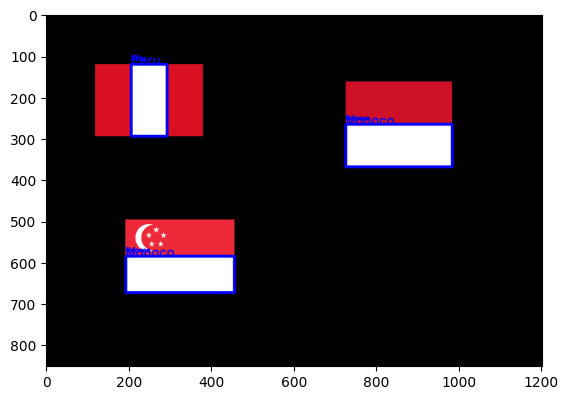

In [84]:
## Para testar a função identifica_bandeira

# Você pode testar a função identifica_bandeira com as imagens de teste fornecidas
# 
img = cv2.imread('img/teste1.png')
# img = cv2.imread('img/teste2.png')
# img = cv2.imread('img/teste3.png')
# img = cv2.imread('img/teste4.png')

# Chamar a função identifica_bandeira
resultado = identifica_bandeira(img)

# Imprimir o resultado da função identifica_bandeira 
print(resultado)

# Desenhar as bandeiras na imagem
bgr = draw_bandeiras(resultado, img)
plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
plt.show()


